In [129]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [68]:
gaip2017 = pd.read_csv("../input/서울특별시 공공자전거 신규가입자 정보(일별)_2017년.csv", engine='python').reset_index()
gaip2018 = pd.read_csv("../input/서울특별시 공공자전거 신규가입자 정보(일별)_2018년.csv", engine='python').reset_index()
gaip = pd.concat([gaip2017,gaip2018]).reset_index()
del gaip['level_0']
del gaip['index']
gaip.tail()

,'대여일자','사용자코드','성별','연령대코드','신규가입자수'
8090,'2018-07-15','회원-내국인','','70대~',2937
8091,'2018-07-16','회원-내국인','','70대~',2161
8092,'2018-07-17','회원-내국인','','70대~',2133
8093,'2018-07-18','회원-내국인','','70대~',2123
8094,'2018-07-19','회원-내국인','','70대~',2194


In [ ]:
# gaip["'대여일자'"] = gaip["'대여일자'"].apply(lambda x: datetime.datetime.strptime(x.replace("'","") , "%Y-%m-%d").date())
gaip['Date'] = pd.to_datetime(gaip["'대여일자'"])

In [131]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

In [ ]:
sumgaip = gaip[gaip["'사용자코드'"] == "'회원-외국인관광객'"].groupby("'대여일자'")["'신규가입자수'"].sum().reset_index()
sumgaip['대여'] = pd.to_datetime(sumgaip["'대여일자'"])
sumgaip = sumgaip.set_index("대여", inplace=False)
sumgaip.resample(rule='w').sum().plot(kind='bar', figsize=(20,6))

In [135]:
sumgaip.resample(rule='w').sum()

,'신규가입자수'
대여,
2017-01-01,126
2017-01-08,913
2017-01-15,352
2017-01-22,300
2017-01-29,273
2017-02-05,483
2017-02-12,459
2017-02-19,732
2017-02-26,816


In [149]:
sumgaip = gaip.groupby(["'성별'","'대여일자'"])["'신규가입자수'"].sum().reset_index()
sumgaip['대여'] = pd.to_datetime(sumgaip["'대여일자'"])
sumgaip = sumgaip.set_index("대여", inplace=False)
sumgaip.tail()

,'성별','대여일자','신규가입자수'
대여,,,
2018-06-16,'M',2018-06-16,1794
2018-06-17,'M',2018-06-17,1790
2018-06-18,'M',2018-06-18,387
2018-06-19,'M',2018-06-19,903
2018-06-20,'M',2018-06-20,488


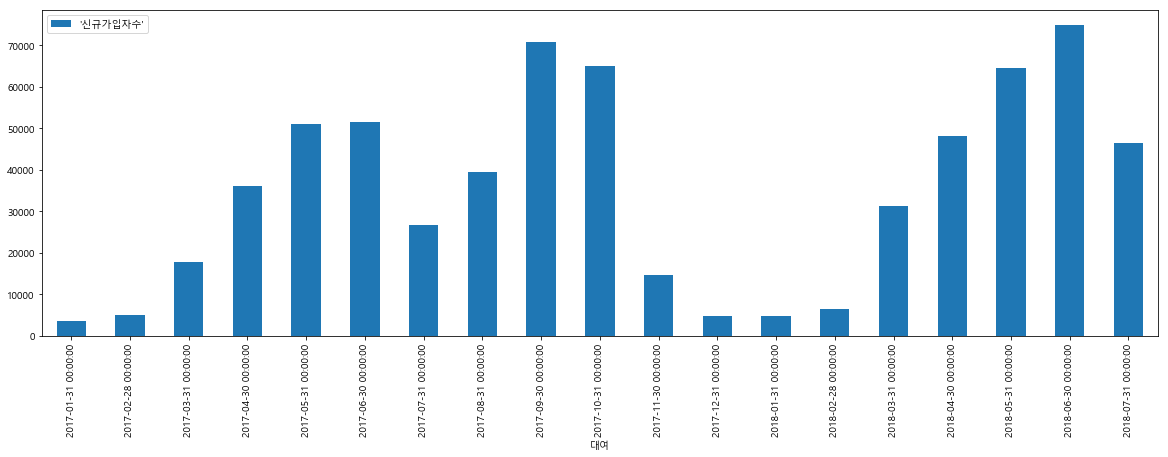

In [150]:
sumgaip.resample(rule='m').sum().plot(kind='bar', figsize=(20,6))

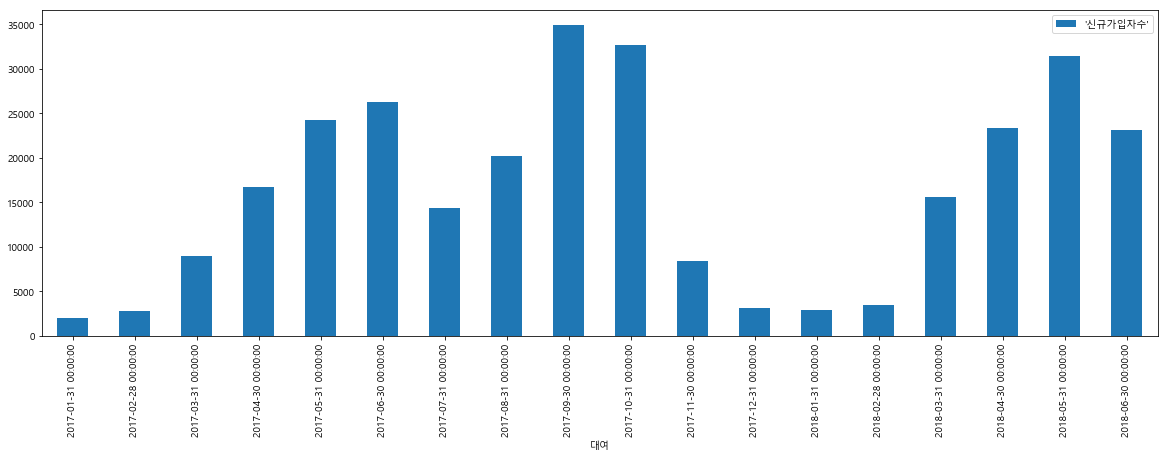

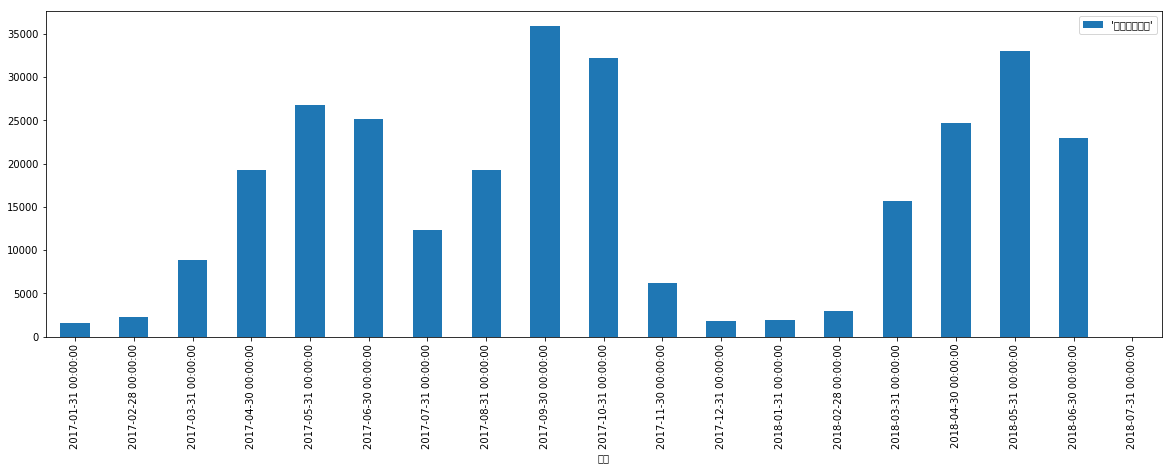

In [127]:
sumgaip = gaip[gaip["'성별'"] == "'F'"].groupby("'대여일자'")["'신규가입자수'"].sum().reset_index()
sumgaip['대여'] = pd.to_datetime(sumgaip["'대여일자'"])
sumgaip = sumgaip.set_index("대여", inplace=False)
sumgaip.resample(rule='m').sum().plot(kind='bar', figsize=(20,6))

TypeError: float() argument must be a string or a number, not 'datetime.date'

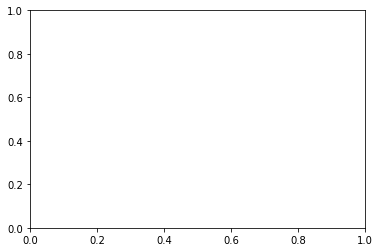

In [88]:
# sns.jointplot(x="'대여일자'", y="'신규가입자수'", data=sumgaip, kind='scatter')
sns.rugplot(sumgaip["'대여일자'"])
plt.title("꽃받침의 길이와 넓이의 Joint Plot")
plt.show()